In [26]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Aux. Functions
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1.0 - sigmoid(x))

def signal(x):
    if x >= 0.0:
        return 1.0
    return -1.0

def xor(x):
    if signal(x[0]) == signal(x[1]):
        return 1.0
    return 0.0


In [28]:
# Implementing the Neural Network with Back Propagation
class NeuralNetwork:
    def __init__(self, num_inputs, num_hiddens, num_outputs, alpha):
        self.num_inputs = num_inputs
        self.num_hiddens = num_hiddens
        self.num_outputs = num_outputs
        self.alpha = alpha
        self.weights = [None] * 3
        self.biases = [None] * 3
        self.weights[1] = 0.001 * np.random.randn(num_hiddens, num_inputs)
        self.weights[2] = 0.001 * np.random.randn(num_outputs, num_hiddens)
        self.biases[1] = np.zeros((num_hiddens, 1))
        self.biases[2] = np.zeros((num_outputs, 1))

    def forward_propagation(self, inputs):

        # Creating lists to store the values of z and a
        z = [None] * 3
        a = [None] * 3

        # Input layer (l = 0)
        z[0] = inputs
        a[0] = inputs

        # Hidden layer(l = 1)
        z[1] = np.dot(self.weights[1], a[0]) + self.biases[1]
        a[1] = sigmoid(z[1])

        # Output  (l = 2)
        z[2] = np.dot(self.weights[2], a[1]) + self.biases[2]
        a[2] = sigmoid(z[2])

        return z, a

    def compute_cost(self, inputs, expected_outputs):
        z, a = self.forward_propagation(inputs)
        y = expected_outputs
        y_hat = a[-1]
        cost = np.mean(-(y * np.log(y_hat) + (1.0 - y) * np.log(1.0 - y_hat)))
        return cost

    def compute_gradient_back_propagation(self, inputs, expected_outputs):
        weights_gradient = [None] * 3
        biases_gradient = [None] * 3

        # Add logic to compute the gradients

        # Catching the main parameters:
        z, a = self.forward_propagation(inputs)

        delta = [None] * 3

        y = expected_outputs

        # Number of samples
        m = inputs.shape[1]

        # delta expressions
        delta[2] = a[2] - y
        delta[1] = np.dot(self.weights[2].T, delta[2]) * sigmoid_derivative(z[1])

        # Output layer (l = 2)
        weights_gradient[2] = (1 / m) * (np.dot(delta[2], a[1].T))
        biases_gradient[2] = (1 / m) * (np.sum(delta[2], axis = 1, keepdims=True))

        # Hidden layer (l = 1)
        weights_gradient[1] = (1 / m) * (np.dot(delta[1], a[0].T))
        biases_gradient[1] = (1 / m) * (np.sum(delta[1], axis = 1, keepdims=True))


        return weights_gradient, biases_gradient

    def back_propagation(self, inputs, expected_outputs):
        weights_gradient, biases_gradient = self.compute_gradient_back_propagation(inputs, expected_outputs)

        # Add logic to update the weights and biases
        layers = 3
        for l in range(layers):
            # We cannot iterate over a None element
            if l == 0:
                continue
            else:
                self.weights[l] = self.weights[l] - self.alpha * weights_gradient[l]
                self.biases[l] = self.biases[l] - self.alpha * biases_gradient[l]


epoch: 1; cost: 0.713217
epoch: 2; cost: 1.025937
epoch: 3; cost: 2.659219
epoch: 4; cost: 1.483262
epoch: 5; cost: 1.370024
epoch: 6; cost: 0.959771
epoch: 7; cost: 0.931880
epoch: 8; cost: 0.852704
epoch: 9; cost: 0.832057
epoch: 10; cost: 0.793588
epoch: 11; cost: 0.780559
epoch: 12; cost: 0.759319
epoch: 13; cost: 0.750729
epoch: 14; cost: 0.737967
epoch: 15; cost: 0.732086
epoch: 16; cost: 0.723995
epoch: 17; cost: 0.719866
epoch: 18; cost: 0.714551
epoch: 19; cost: 0.711606
epoch: 20; cost: 0.708025
epoch: 21; cost: 0.705903
epoch: 22; cost: 0.703448
epoch: 23; cost: 0.701909
epoch: 24; cost: 0.700203
epoch: 25; cost: 0.699083
epoch: 26; cost: 0.697886
epoch: 27; cost: 0.697068
epoch: 28; cost: 0.696222
epoch: 29; cost: 0.695625
epoch: 30; cost: 0.695023
epoch: 31; cost: 0.694586
epoch: 32; cost: 0.694156
epoch: 33; cost: 0.693836
epoch: 34; cost: 0.693528
epoch: 35; cost: 0.693294
epoch: 36; cost: 0.693072
epoch: 37; cost: 0.692900
epoch: 38; cost: 0.692740
epoch: 39; cost: 0.69

Text(0.5, 1.0, 'Neural Network Classification')

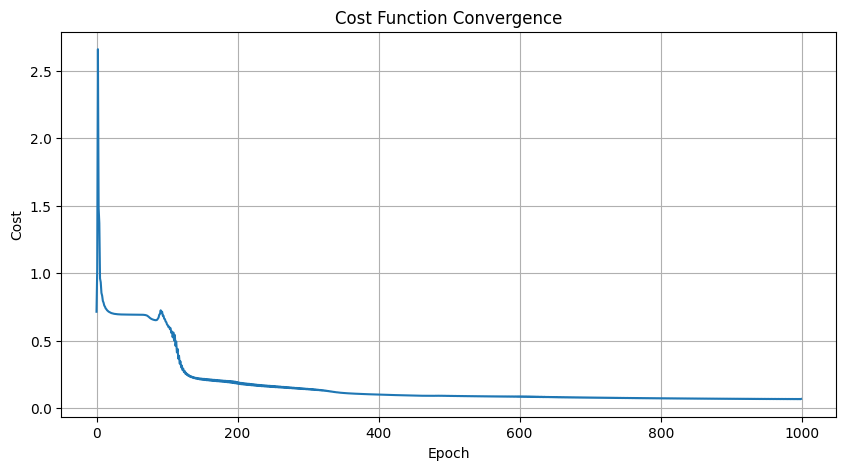

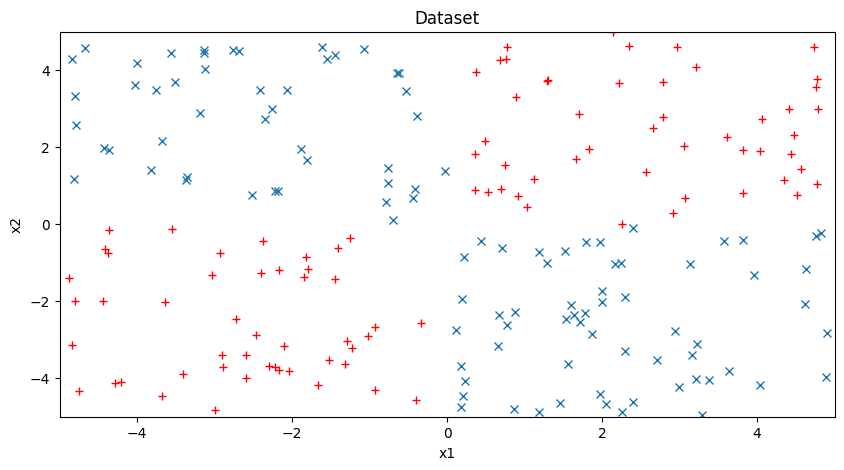

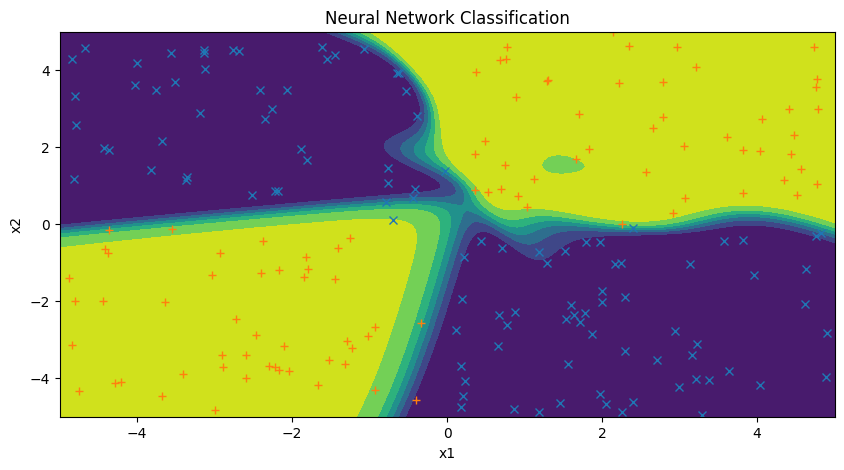

In [29]:
# Testing the Neural Network
num_cases = 200  # number of auto-generated cases
num_epochs = 1000  # number of epochs for training
classification_function = xor  # selects xor as the classification function

# Setting the random seed of numpy's random library for reproducibility reasons
np.random.seed(0)

# Creating the dataset
inputs = 5.0 * (-1.0 + 2.0 * np.random.rand(num_cases, 2))
expected_outputs = np.array([classification_function(x) for x in inputs])

# Separating the dataset into positive and negative samples
positives_indices = np.where(expected_outputs >= 0.5)
negatives_indices = np.where(expected_outputs < 0.5)
positives = inputs[positives_indices]
negatives = inputs[negatives_indices]

# Creating and training the neural network
neural_network = NeuralNetwork(2, 10, 1, 6.0)
costs = np.zeros(num_epochs)
inputs_nn = inputs.T
for i in range(num_epochs):
    neural_network.back_propagation(inputs_nn, expected_outputs)
    costs[i] = neural_network.compute_cost(inputs_nn, expected_outputs)
    print('epoch: %d; cost: %f' % (i + 1, costs[i]))

# Plotting cost function convergence
plt.figure(figsize=(10, 5))
plt.plot(costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid()

# Plotting positive and negative samples
plt.figure(figsize=(10, 5))
plt.plot(positives[:, 0], positives[:, 1], '+r')
plt.plot(negatives[:, 0], negatives[:, 1], 'x')
plt.xlim([-5.0, 5.0])
plt.ylim([-5.0, 5.0])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset')

# Plotting the decision regions of the neural network
plt.figure(figsize=(10, 5))
x = np.arange(-5.0, 5.05, 0.05)
y = np.arange(-5.0, 5.05, 0.05)
xx, yy = np.meshgrid(x, y)
inputs_region = np.array([xx.flatten(), yy.flatten()])
_, a = neural_network.forward_propagation(inputs_region)
z = a[-1].reshape(len(x), len(y))
plt.contourf(x, y, z)
plt.xlim([-5.0, 5.0])
plt.ylim([-5.0, 5.0])
plt.plot(positives[:, 0], positives[:, 1], '+', color='tab:orange')
plt.plot(negatives[:, 0], negatives[:, 1], 'x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Neural Network Classification')


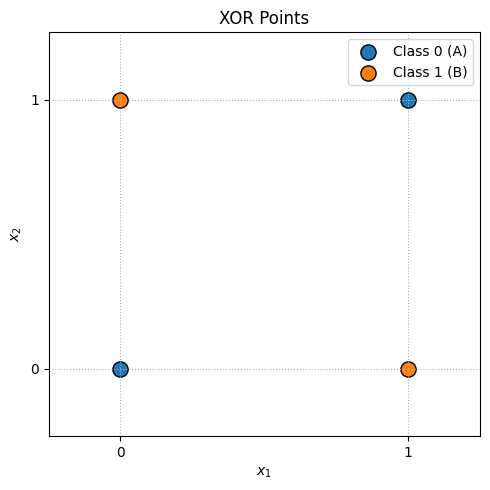

In [33]:
# XOR Dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=float)

y = np.array([0, 1, 1, 0])   # 0 = class A, 1 = class B

plt.figure(figsize=(5,5))

# Plot each class separately
plt.scatter(X[y==0, 0], X[y==0, 1], s=120, edgecolors='k', label='Class 0 (A)')
plt.scatter(X[y==1, 0], X[y==1, 1], s=120, edgecolors='k', label='Class 1 (B)')

plt.xticks([0, 1]); plt.yticks([0, 1])
plt.xlim(-0.25, 1.25); plt.ylim(-0.25, 1.25)
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.title('XOR Points')
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()


a) Is it a linear problem? Draw a graph.  
- R.: Não. O XOR não é linearmente separável. No plano (x₁, x₂), os pontos (0,0) e (1,1) pertencem à classe A (saída 0) e os pontos (0,1) e (1,0) à classe B (saída 1). Ao desenhar esses quatro pontos, percebe-se que qualquer **reta** traçada sempre deixa um ponto do lado errado; seria preciso duas retas (ou uma fronteira não linear).

b) Do a simulation and observe what happens in the solution found by the perceptron. Is it possible to determine the perceptron network parameters capable of solving this problem? Why?  
- R.: Ao treinar um **perceptron de uma única camada** no XOR, a convergência não ocorre: o erro não zera e os pesos tendem a oscilar ou estabilizar com erro residual. Pelo **Teorema de Convergência do Perceptron**, o algoritmo só converge quando os dados são linearmente separáveis. Como o XOR não é, **não existe** par (w, b) que resolva exatamente o problema com um único neurônio; portanto, não há parâmetros de um perceptron simples capazes de separar perfeitamente as classes.

c) Is it possible to separate the 2 classes using the perceptron? Present a solution.  
- R.: Com **um único perceptron, não**. Com uma **rede de perceptrons (MLP com pelo menos 1 camada oculta)**, sim. Uma decomposição clássica é XOR = (x₁ OR x₂) AND NOT(x₁ AND x₂). Implementa-se com dois neurônios ocultos e um de saída:  
  • h₁ (OR): pesos [1, 1], viés −0.5 → ativa quando pelo menos uma entrada é 1;  
  • h₂ (AND): pesos [1, 1], viés −1.5 → ativa só quando ambas são 1;  
  • saída y: step(1·h₁ − 1·h₂ − 0.5) → produz 1 quando h₁=1 e h₂=0, isto é, exatamente nos casos XOR.  
  Alternativamente, pode-se mapear as entradas para um espaço maior com o termo de interação φ(x) = [x₁, x₂, x₁·x₂]; nesse espaço, um classificador linear (um perceptron) já consegue separar as classes.